In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from scipy import stats
stats.chisprob = lambda chisq, df: stats.chi2.sf(chisq,df)

Load the data

In [10]:
raw_data = pd.read_csv('2.01.+Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [11]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

Variables

In [12]:
y = data['Admitted']
x1= data['SAT']

### Let's plot the data

Scatter plot

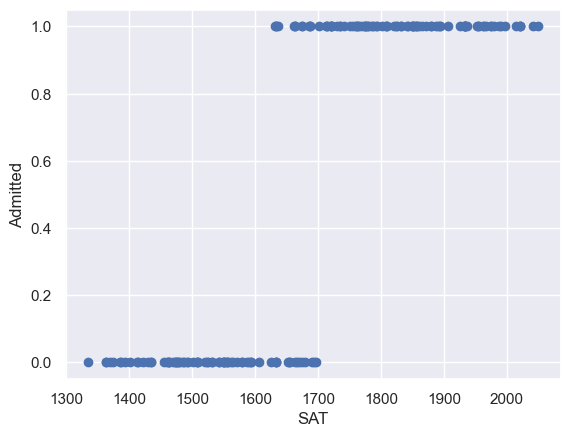

In [13]:
plt.scatter(x1, y, color = 'C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()


Regression

In [14]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


Summary

In [15]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Jun 2024   Pseudo R-squ.:                  0.7992
Time:                        15:51:26   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Interpreting the summary

In [19]:
#Methhod: MLE (Maximum likelihood estimation)

#Likelihood function:

#a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables

#the bigger the likelihood function, the higher the probability that our model is correct






In [20]:
#Log-likelihood: -23.145

#MLE tries to maximize the log likelihood

#The computer goes through different values, until it finds a model which the log likelihood is the highest

#When it can no longer improve it, it will just stop the optimization


In [22]:
#LL-Null (log-likelihood null)
#the log likelihood of a model which has no independent variables

In [21]:
#LLR p-value (log likelihood ratio test), something like f-statistic 

#to determine if our model is significant

#measures if our model is statiscally different from LL-null (useless model)

In [ ]:
#Pseudo R-squared

#A good pseudo r-squared is somewhere between 0.2 and 0.4
# this measure is mostly usefull for comparing variations of the same model

#different models will have completely different and incomparable Pseudo r-squares

In [23]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Jun 2024   Pseudo R-squ.:                  0.7992
Time:                        16:28:40   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#Logit model:

#log (pi/1-pi) = -69.91 + 0.042 * SAT